In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

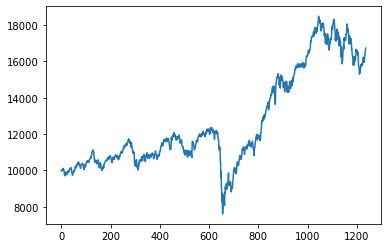

In [2]:
df1 = pd.read_csv('NSE.csv')
df2 = df1['Close'].fillna(method='ffill')

plt.plot(df2)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [4]:
def create_dataset(df, timestep):
    dataX,dataY = [],[]
    for i in range (len(df)-timestep-1):
        a = df[i:(i+timestep), 0]
        dataX.append(a)
        dataY.append(df[i+timestep,0])
    return np.array(dataX), np.array(dataY)

In [5]:
## split the dataset into train and test split
training_size = int(len(df)*0.90)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df),:1]

X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1012, 100), (1012,), (23, 100), (23,))

In [6]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [8]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Metal device set to: Apple M1


2022-07-26 14:54:38.158054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-26 14:54:38.158359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200


2022-07-26 14:54:39.591524: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-26 14:54:41.770758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:42.138994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:43.343988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:43.517045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:43.628894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:44.625247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

16/16 [==============================] - ETA: 0s - loss: 0.0518

2022-07-26 14:54:49.052297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:49.168528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:49.270778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:54:49.373706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 10s 206ms/step - loss: 0.0518 - val_loss: 0.0213
Epoch 2/200
 1/16 [>.............................] - ETA: 1s - loss: 0.0103

2022-07-26 14:54:49.479598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 71ms/step - loss: 0.0086 - val_loss: 0.0014
Epoch 3/200
16/16 [==============================] - 1s 69ms/step - loss: 0.0031 - val_loss: 0.0065
Epoch 4/200
16/16 [==============================] - 1s 70ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 5/200
16/16 [==============================] - 1s 70ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 6/200
16/16 [==============================] - 1s 70ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 7/200
16/16 [==============================] - 1s 70ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/200
16/16 [==============================] - 1s 70ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/200
16/16 [==============================] - 1s 69ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/200
16/16 [==============================] - 1s 71ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 11/200
16/16 [==============================] - 1s 70ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 12/2

In [10]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

2022-07-26 14:58:53.480945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:53.605671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:53.723211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:53.838436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/32 [..............................] - ETA: 34s

2022-07-26 14:58:53.949508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 365ms/step


In [11]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred))
math.sqrt(mean_squared_error(y_test, test_pred))

16004.520688319139

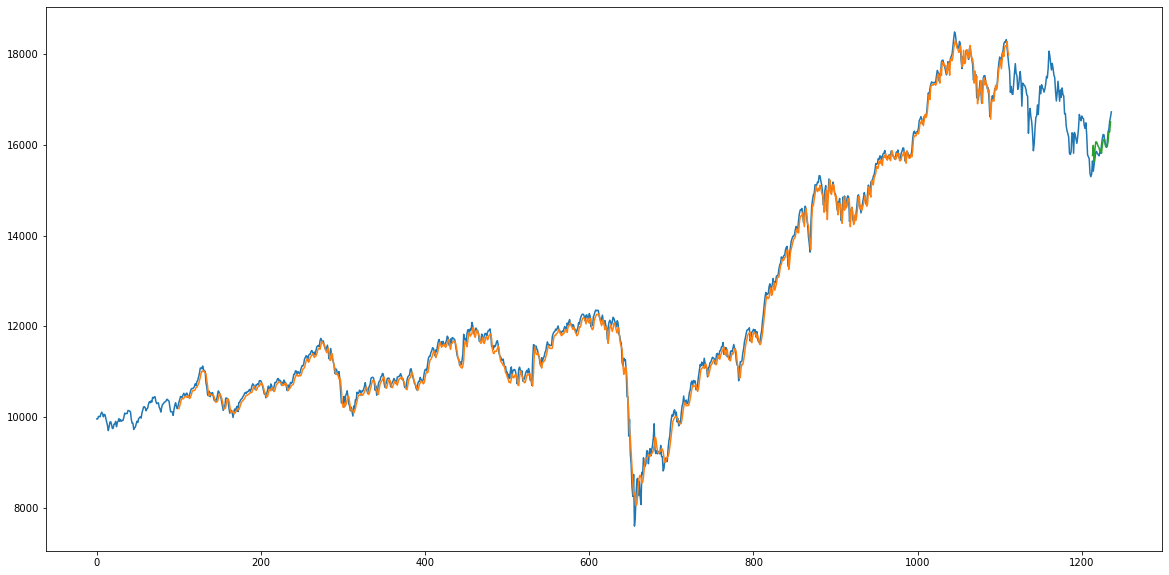

In [12]:
plt.figure(figsize=(20,10))
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_pred)+look_back,:] = train_pred

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df)-1,:] = test_pred

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [13]:
X, y = create_dataset(df, 100)
model2 = Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')

model2.summary()
model2.fit(X,y,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


2022-07-26 14:58:59.075808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:59.420891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:59.532817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:59.662961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:59.780779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:58:59.910803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:59:00.118771: I tensorflow/core/grappler/optimizers/cust

18/18 [==============================] - ETA: 0s - loss: 0.0800

2022-07-26 14:59:03.599920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:59:03.734811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:59:03.843608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 14:59:03.961312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 7s 203ms/step - loss: 0.0800 - val_loss: 0.0202
Epoch 2/200
 1/18 [>.............................] - ETA: 1s - loss: 0.0080

2022-07-26 14:59:04.075649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 78ms/step - loss: 0.0094 - val_loss: 0.0016
Epoch 3/200
18/18 [==============================] - 1s 77ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 4/200
18/18 [==============================] - 1s 74ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 5/200
18/18 [==============================] - 1s 74ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 6/200
18/18 [==============================] - 1s 78ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 7/200
18/18 [==============================] - 1s 76ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/200
18/18 [==============================] - 1s 75ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 9/200
18/18 [==============================] - 1s 75ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 10/200
18/18 [==============================] - 1s 77ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/200
18/18 [==============================] - 1s 74ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 12/2

In [ ]:
test_pred = model2.predict(X_test)

2022-07-26 15:03:42.060344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 15:03:42.192545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 15:03:42.306225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-26 15:03:42.425981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


2022-07-26 15:03:42.539869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
test_pred = scaler.inverse_transform(test_pred)

In [ ]:
y_test.shape

(23,)

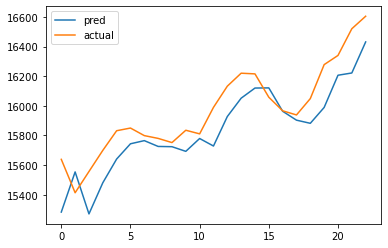

In [ ]:
plt.plot(test_pred,label='pred')
plt.plot(scaler.inverse_transform(y_test.reshape(23,1)),label='actual')
plt.legend()

In [ ]:
m = X[-1].reshape(1,100,1)
data = []

In [ ]:
for i in range(6):
    a = model2.predict(m)
    print('price on day '+str(i)+': '+str(scaler.inverse_transform(a)))
    data.append(scaler.inverse_transform(a))
    m = np.insert(m,100,a)
    m = np.delete(m,0).reshape(1,100,1)

1/1 [==============================] - 1s 1s/step
price on day 0: [[16431.719]]
1/1 [==============================] - 0s 45ms/step
price on day 1: [[16313.849]]
1/1 [==============================] - 0s 44ms/step
price on day 2: [[16219.965]]
1/1 [==============================] - 0s 46ms/step
price on day 3: [[16156.208]]
1/1 [==============================] - 0s 47ms/step
price on day 4: [[16085.623]]
1/1 [==============================] - 0s 44ms/step
price on day 5: [[16002.825]]


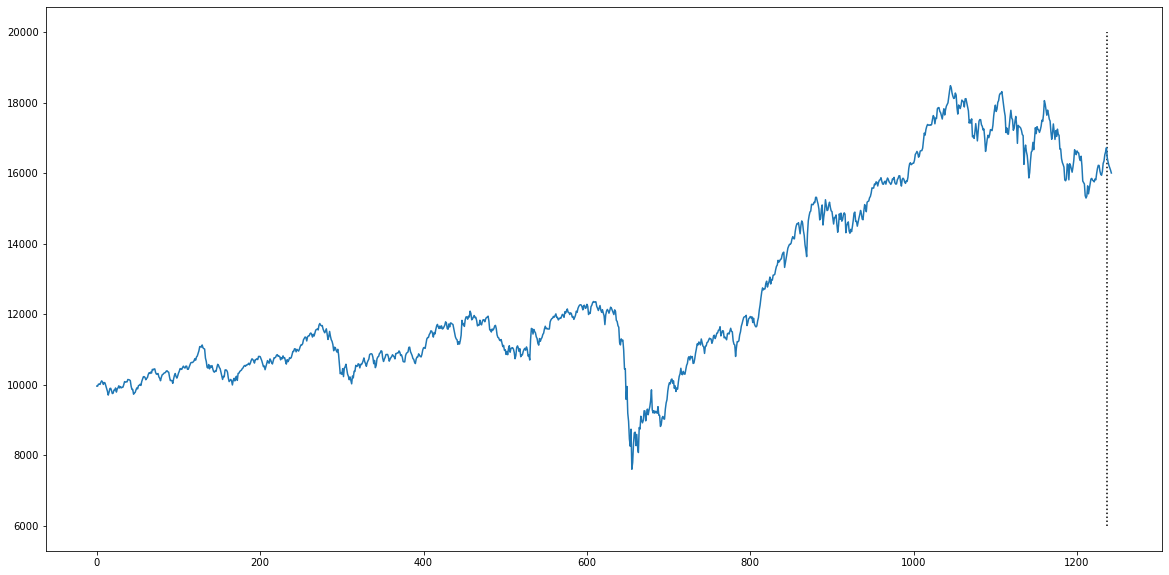

In [ ]:
plt.figure(figsize=(20,10))
plt.vlines(1237, 6000, 20000, linestyles ="dotted", colors ="k")
plt.plot(np.hstack([np.array(df2),np.hstack(data).ravel()]))
plt.show()